In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats
import scipy.io as io
import time

from scipy.interpolate import CubicSpline

plt.rc("font", family=["Times New Roman"]) #skifter skrifttype
plt.rc("axes", labelsize=18)   #skriftstørrelse af `xlabel` og `ylabel`
plt.rc("xtick", labelsize=16, direction="out")  #skriftstørrelse af ticks og viser ticks øverst
plt.rc("ytick", labelsize=16, direction="out")
plt.rc("axes", titlesize=22)
plt.rc("legend", fontsize=16)

In [43]:
def plaw(wl, *p) : 
    c = 299792458 # m/s
    h = 6.62607015e-34 # J*s
    kB = 1.380649e-23 # J/K
    A = p[0]
    T = p[1] # K
    return A*(2*h*c**2)/(wl**5)*1/(np.exp((h*c)/(wl*kB*T))-1)

def wien(l_max) : 
    b = 2.9*1e-3 # m K
    return b/l_max

5668.845588465268


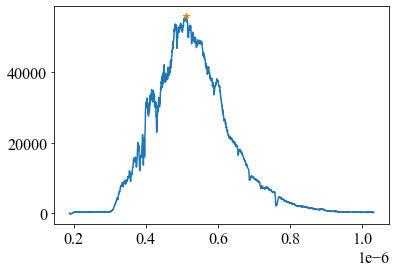

In [51]:
d1 = r"../Sun1.txt"
d2 = "r../Sun2.txt"

def getdata(path) :
    data = np.genfromtxt(d1, skip_header=1)
    wl = []
    i = []
    for ar in data : 
        wl.append(ar[0]*1e-9)
        i.append(ar[1])
    return (wl, i)
        
l, i = getdata(d1)
plt.plot(l, i)

index = np.argmax(i)
lmax = l[index]

plt.plot(l[index], i[index], '*')
print(wien(l[index]))

#l_fit = np.linspace(np.min(l), np.max(l), 1000)
#popt, pcurve = curve_fit(plaw, l, i, p0=[1000, 5800])
#i_fit = plaw(l_fit, *popt)
#plt.plot(l_fit, i_fit)


[187.923  53.25      nan]
